In [89]:
import pandas as pd
import numpy as np

均值中位数：.mean(),.median()
累加累乘：.sum(),.prod()
最大最小：.max(),.min()
处理空白值：.isnull(),.notnull(),.dropna(),.fillna()
获取索引：.idxmin(),.idxmax()


数据


In [90]:
import pandas as pd
import numpy as np

data = np.array([
    [1.39, 1.77, None],
    [0.34, 1.91, -0.05],
    [0.34, 1.47, 1.22],
    [None, 0.27, -0.61]
])
df = pd.DataFrame(data, index=["r0", "r1", "r2", "r3"], columns=["c0", "c1", "c2"])
df

c0    c1    c2
r0  1.39  1.77  None
r1  0.34  1.91 -0.05
r2  0.34  1.47  1.22
r3  None  0.27 -0.61

In [91]:
#summary
df.describe()

c0    c1    c2
count   3.00  4.00  3.00
unique  2.00  4.00  3.00
top     0.34  1.77 -0.05
freq    2.00  1.00  1.00

In [30]:
df1 = pd.DataFrame(np.random.random((4,3)), columns=["c0", "c1", "c2"])
print(df1)
print("\ndescribe:\n", df1.describe())


         c0        c1        c2
0  0.389779  0.691154  0.813419
1  0.042538  0.226603  0.792801
2  0.154934  0.252695  0.363321
3  0.467568  0.047812  0.431112

describe:
              c0        c1        c2
count  4.000000  4.000000  4.000000
mean   0.263705  0.304566  0.600163
std    0.198495  0.273338  0.236121
min    0.042538  0.047812  0.363321
25%    0.126835  0.181905  0.414164
50%    0.272357  0.239649  0.611956
75%    0.409227  0.362310  0.797955
max    0.467568  0.691154  0.813419


In [31]:
df.mean()

c0    0.690000
c1    1.355000
c2    0.186667
dtype: float64

In [92]:
df.mean(axis=0)

c0    0.690000
c1    1.355000
c2    0.186667
dtype: float64

In [33]:
df.mean(axis=0, skipna=False)

C:\Users\pretend\AppData\Local\Temp\ipykernel_16728\1031476208.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean(axis=0, skipna=False)


c1    1.355
dtype: float64

累加累乘

In [34]:
df = pd.DataFrame(np.arange(12).reshape((4,3)), columns=["c0", "c1", "c2"])
df

c0  c1  c2
0   0   1   2
1   3   4   5
2   6   7   8
3   9  10  11

In [35]:
print("sum():\n", df.sum())
print("\nsum(axis=0):\n", df.sum(axis=0))
print("\nsum(axis=1):\n", df.sum(axis=1))

sum():
 c0    18
c1    22
c2    26
dtype: int64

sum(axis=0):
 c0    18
c1    22
c2    26
dtype: int64

sum(axis=1):
 0     3
1    12
2    21
3    30
dtype: int64


In [36]:
print("prod():\n", df.prod())
print("\nprod(axis=0):\n", df.prod(axis=0))
print("\nprod(axis=1):\n", df.prod(axis=1))

prod():
 c0      0
c1    280
c2    880
dtype: int32

prod(axis=0):
 c0      0
c1    280
c2    880
dtype: int32

prod(axis=1):
 0      0
1     60
2    336
3    990
dtype: int32


最大最小

In [37]:
print("max():\n", df.max())
print("\nmin():\n", df.min())

max():
 c0     9
c1    10
c2    11
dtype: int32

min():
 c0    0
c1    1
c2    2
dtype: int32


In [38]:
print(df.max().max())
print(df.values.ravel().max())  # 用 Numpy 的方式运算

11
11


缺失值处理

In [39]:
df = pd.DataFrame([[1, 2, 3, 0],
                   [3, 4, None, 1],
                   [None, None, None, None],
                   [None, 3, None, 4]],
                  columns=list("ABCD"))
print(df)
print("\nisnull():\n", df.isnull())  # True 就是空
print("\nnotnull()\n", df.notnull())  # False 为空

     A    B    C    D
0  1.0  2.0  3.0  0.0
1  3.0  4.0  NaN  1.0
2  NaN  NaN  NaN  NaN
3  NaN  3.0  NaN  4.0

isnull():
        A      B      C      D
0  False  False  False  False
1  False  False   True  False
2   True   True   True   True
3   True  False   True  False

notnull()
        A      B      C      D
0   True   True   True   True
1   True   True  False   True
2  False  False  False  False
3  False   True  False   True


In [40]:
print("默认：\n", df.dropna())  # 默认按 axis=0
print("\naxis=1:\n", df.dropna(axis=1))  # 可以换一个 axis drop

默认：
      A    B    C    D
0  1.0  2.0  3.0  0.0

axis=1:
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


In [41]:
values = {"A": 0, "B": 1, "C": 2, "D": 3}
df.fillna(value=values)

A    B    C    D
0  1.0  2.0  3.0  0.0
1  3.0  4.0  2.0  1.0
2  0.0  1.0  2.0  3.0
3  0.0  3.0  2.0  4.0

筛选赋值运算

In [42]:
import pandas as pd
import numpy as np

data = np.arange(-12, 12).reshape((6, 4))
df = pd.DataFrame(
    data,
    index=list("abcdef"),
    columns=list("ABCD"))
df

A   B   C   D
a -12 -11 -10  -9
b  -8  -7  -6  -5
c  -4  -3  -2  -1
d   0   1   2   3
e   4   5   6   7
f   8   9  10  11

In [43]:
df["A"] *= 0
df

A   B   C   D
a  0 -11 -10  -9
b  0  -7  -6  -5
c  0  -3  -2  -1
d  0   1   2   3
e  0   5   6   7
f  0   9  10  11

In [44]:
df.loc["a", "A"] = 100
df.iloc[1, 0] = 200
df

A   B   C   D
a  100 -11 -10  -9
b  200  -7  -6  -5
c    0  -3  -2  -1
d    0   1   2   3
e    0   5   6   7
f    0   9  10  11

In [45]:
df.loc["a", :] = df.loc["a", :] * 2
df


A   B   C   D
a  200 -22 -20 -18
b  200  -7  -6  -5
c    0  -3  -2  -1
d    0   1   2   3
e    0   5   6   7
f    0   9  10  11

In [46]:
df["A"][df["A"] == 0] = -1
df

A   B   C   D
a  200 -22 -20 -18
b  200  -7  -6  -5
c   -1  -3  -2  -1
d   -1   1   2   3
e   -1   5   6   7
f   -1   9  10  11

In [47]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df

A  B
0  4  9
1  4  9
2  4  9

In [48]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df

A  B
0  4  9
1  4  9
2  4  9

In [49]:
np.sqrt(df)

A    B
0  2.0  3.0
1  2.0  3.0
2  2.0  3.0

In [50]:
df.apply(np.sqrt)

A    B
0  2.0  3.0
1  2.0  3.0
2  2.0  3.0

In [51]:
def func(x):
    return x[0] * 2, x[1] * -1

df.apply(func, axis=1, result_type='expand') #broadcast

0  1
0  8 -9
1  8 -9
2  8 -9

In [52]:
def func(x):
    return x[0] * 2, x[1] * -1

df.apply(func, axis=1, result_type='broadcast')

A  B
0  8 -9
1  8 -9
2  8 -9

文本处理

In [53]:
import pandas as pd

py_s = "A,B,C,Aaba,Baca,CABA,dog,cat"
pd_s = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", "CABA", "dog", "cat"],
    dtype="string")

print("python:\n", py_s.upper())
print("\npandas:\n", pd_s.str.upper())

python:
 A,B,C,AABA,BACA,CABA,DOG,CAT

pandas:
 0       A
1       B
2       C
3    AABA
4    BACA
5    CABA
6     DOG
7     CAT
dtype: string


In [54]:
pd_not_s = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", "CABA", "dog", "cat"],
)
print("pd_not_s type:", pd_not_s.dtype)
pd_s = pd_not_s.astype("string")
print("pd_s type:", pd_s.dtype)

pd_not_s type: object
pd_s type: string


In [55]:
print("python lower:\n", py_s.lower())
print("\npandas lower:\n", pd_s.str.lower())
print("python len:\n", [len(s) for s in py_s.split(",")])
print("\npandas len:\n", pd_s.str.len())

python lower:
 a,b,c,aaba,baca,caba,dog,cat

pandas lower:
 0       a
1       b
2       c
3    aaba
4    baca
5    caba
6     dog
7     cat
dtype: string
python len:
 [1, 1, 1, 4, 4, 4, 3, 3]

pandas len:
 0    1
1    1
2    1
3    4
4    4
5    4
6    3
7    3
dtype: Int64


In [56]:
py_s = ["   jack", "jill ", "    jesse    ", "frank"]
pd_s = pd.Series(py_s, dtype="string")
print("python strip:\n", [s.strip() for s in py_s])
print("\npandas strip:\n", pd_s.str.strip())

print("\n\npython lstrip:\n", [s.lstrip() for s in py_s])
print("\npandas lstrip:\n", pd_s.str.lstrip())

print("\n\npython rstrip:\n", [s.rstrip() for s in py_s])
print("\npandas rstrip:\n", pd_s.str.rstrip())

python strip:
 ['jack', 'jill', 'jesse', 'frank']

pandas strip:
 0     jack
1     jill
2    jesse
3    frank
dtype: string


python lstrip:
 ['jack', 'jill ', 'jesse    ', 'frank']

pandas lstrip:
 0         jack
1        jill 
2    jesse    
3        frank
dtype: string


python rstrip:
 ['   jack', 'jill', '    jesse', 'frank']

pandas rstrip:
 0         jack
1         jill
2        jesse
3        frank
dtype: string


In [57]:
py_s = ["a_b_c", "jill_jesse", "frank"]
pd_s = pd.Series(py_s, dtype="string")
print("python split:\n", [s.split("_") for s in py_s])
print("\npandas split:\n", pd_s.str.split("_"))

python split:
 [['a', 'b', 'c'], ['jill', 'jesse'], ['frank']]

pandas split:
 0        [a, b, c]
1    [jill, jesse]
2          [frank]
dtype: object


In [58]:
pd_s.str.split("_", expand=True)


0      1     2
0      a      b     c
1   jill  jesse  <NA>
2  frank   <NA>  <NA>

In [59]:
pd_df = pd.DataFrame([["a", "b"], ["C", "D"]])
pd_df.iloc[0, :].str.upper()

0    A
1    B
Name: 0, dtype: object

pandas同样还支持正则化处理，但是这块需要比较多的时间来教学，我这里略去了，有兴趣的同学可以参考我的code和网上re库的教学

In [60]:
pattern = r"[0-9][a-z]"
s = pd.Series(["1", "1a", "11c", "abc"], dtype="string")
s.str.contains(pattern)

0    False
1     True
2     True
3    False
dtype: boolean

In [61]:
pattern = r"[0-9]+?[a-z]"
s.str.match(pattern)

0    False
1     True
2     True
3    False
dtype: boolean

In [62]:
py_s = ["1", "1a", "21c", "abc"]
pd_s = pd.Series(py_s, dtype="string")
print("py_s replace '1' -> '9':\n", [s.replace("1", "9") for s in py_s])

print("\n\npd_s replace '1' -> '9':\n", pd_s.str.replace("1", "9"))

py_s replace '1' -> '9':
 ['9', '9a', '29c', 'abc']


pd_s replace '1' -> '9':
 0      9
1     9a
2    29c
3    abc
dtype: string


In [63]:
print("pd_s replace -> 'NUM':")
pd_s.str.replace(r"[0-9]", "NUM", regex=True)

pd_s replace -> 'NUM':


0        NUM
1       NUMa
2    NUMNUMc
3        abc
dtype: string

In [64]:
s = pd.Series(['a1', 'b2', 'c3'])
s.str.extract(r"([ab])(\d)")

0    1
0    a    1
1    b    2
2  NaN  NaN

数据融合

In [65]:
df1 = pd.DataFrame({
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
    "C": ["C0", "C1", "C2", "C3"],
    "D": ["D0", "D1", "D2", "D3"],
}, index=[0, 1, 2, 3],)


df2 = pd.DataFrame({
    "A": ["A4", "A5", "A6", "A7"],
    "B": ["B4", "B5", "B6", "B7"],
    "C": ["C4", "C5", "C6", "C7"],
    "D": ["D4", "D5", "D6", "D7"],
}, index=[4, 5, 6, 7],)


df3 = pd.DataFrame({
    "A": ["A8", "A9", "A10", "A11"],
    "B": ["B8", "B9", "B10", "B11"],
    "C": ["C8", "C9", "C10", "C11"],
    "D": ["D8", "D9", "D10", "D11"],
}, index=[8, 9, 10, 11],)

In [66]:
pd.concat([df1, df2, df3])

A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

In [67]:
all_classes = pd.concat(
    [df1, df2, df3],
    keys=["x", "y", "z"])
all_classes

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

融合

In [68]:
left = pd.DataFrame({
    "key": ["K0", "K1", "K2", "K3"],
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
})


right = pd.DataFrame({
    "key": ["K0", "K1", "K2", "K3"],
    "C": ["C0", "C1", "C2", "C3"],
    "D": ["D0", "D1", "D2", "D3"],
})


pd.merge(left, right, on="key")

key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3

In [69]:
left = pd.DataFrame({
    "key1": ["K0", "K0", "K1", "K2"],
    "key2": ["K0", "K1", "K0", "K1"],
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
})


right = pd.DataFrame({
    "key1": ["K0", "K1", "K1", "K2"],
    "key2": ["K0", "K0", "K0", "K0"],
    "C": ["C0", "C1", "C2", "C3"],
    "D": ["D0", "D1", "D2", "D3"],
})


pd.merge(left, right, on=["key1", "key2"])

key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2

In [70]:
pd.merge(left, right, how="left", on=["key1", "key2"])

key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN

In [71]:
left = pd.DataFrame({
    "A": ["A0", "A1", "A2"],
    "B": ["B0", "B1", "B2"]
}, index=["K0", "K1", "K2"])


right = pd.DataFrame({
    "C": ["C0", "C2", "C3"],
    "D": ["D0", "D2", "D3"]
}, index=["K0", "K2", "K3"])

left.join(right)

A   B    C    D
K0  A0  B0   C0   D0
K1  A1  B1  NaN  NaN
K2  A2  B2   C2   D2

In [72]:
left = pd.DataFrame({
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
    "key": ["K0", "K1", "K0", "K1"],
})


right = pd.DataFrame({
    "C": ["C0", "C1"],
    "D": ["D0", "D1"]
}, index=["K0", "K1"])

left.join(right, on="key")


A   B key   C   D
0  A0  B0  K0  C0  D0
1  A1  B1  K1  C1  D1
2  A2  B2  K0  C0  D0
3  A3  B3  K1  C1  D1

prj

In [73]:
import os
import pandas as pd
import numpy as np

In [74]:
path = "iris.csv"
column = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv(path, names=column)
df

sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [75]:
df.isna()

sepal_length  sepal_width  petal_length  petal_width  class
0           False        False         False        False  False
1           False        False         False        False  False
2           False        False         False        False  False
3           False        False         False        False  False
4           False        False         False        False  False
..            ...          ...           ...          ...    ...
145         False        False         False        False  False
146         False        False         False        False  False
147         False        False         False        False  False
148         False        False         False        False  False
149         False        False         False        False  False

[150 rows x 5 columns]

In [76]:
df.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width      True
class           False
dtype: bool

In [77]:
df1 = df.dropna(axis=0, how="any")
df1

sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[149 rows x 5 columns]

In [78]:
df1.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool

<AxesSubplot: >

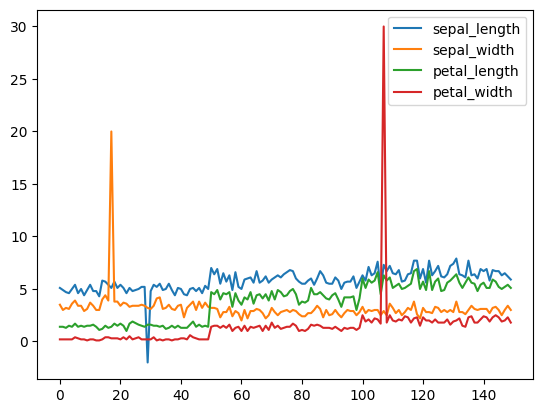

In [79]:
df1.plot()

<AxesSubplot: >

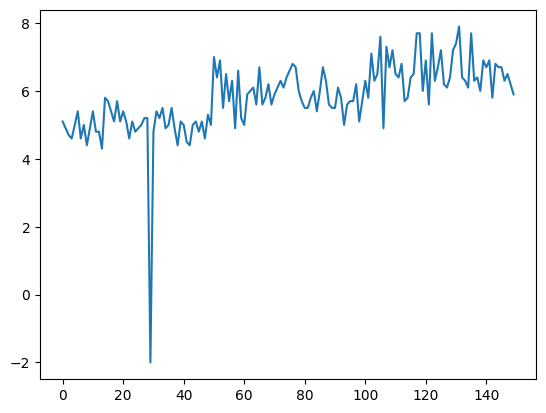

In [80]:
df1["sepal_length"].plot()

<AxesSubplot: >

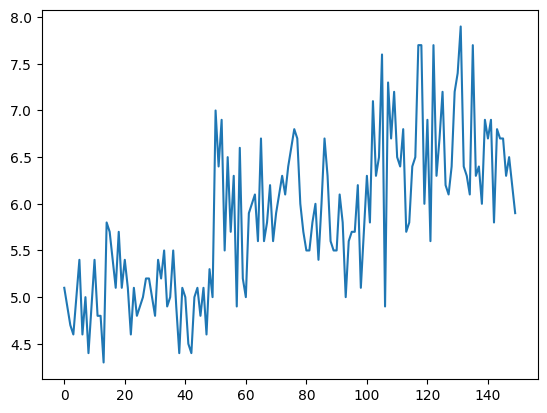

In [81]:
index = df1[df1["sepal_length"]<0].index
df2 = df1.drop(index)
df2["sepal_length"].plot()

In [82]:
total_data = len(df2)
n_train = int(total_data * 0.8)

train_data = df2.iloc[:n_train]
test_data = df2.iloc[n_train:]
test_data

sepal_length  sepal_width  petal_length  petal_width           class
120           6.9          3.2           5.7          2.3  Iris-virginica
121           5.6          2.8           4.9          2.0  Iris-virginica
122           7.7          2.8           6.7          2.0  Iris-virginica
123           6.3          2.7           4.9          1.8  Iris-virginica
124           6.7          3.3           5.7          2.1  Iris-virginica
125           7.2          3.2           6.0          1.8  Iris-virginica
126           6.2          2.8           4.8          1.8  Iris-virginica
127           6.1          3.0           4.9          1.8  Iris-virginica
128           6.4          2.8           5.6          2.1  Iris-virginica
129           7.2          3.0           5.8          1.6  Iris-virginica
130           7.4          2.8           6.1          1.9  Iris-virginica
131           7.9          3.8           6.4          2.0  Iris-virginica
132           6.4          2.8           5.6          2.2  Iris-virginica
133           6.3          2.8           5.1          1.5  Iris-virginica
134           6.1          2.6           5.6          1.4  Iris-virginica
135           7.7          3.0           6.1          2.3  Iris-virginica
136           6.3          3.4           5.6          2.4  Iris-virginica
137           6.4          3.1           5.5          1.8  Iris-virginica
138           6.0          3.0           4.8          1.8  Iris-virginica
139           6.9          3.1           5.4          2.1  Iris-virginica
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142           5.8          2.7           5.1          1.9  Iris-virginica
143           6.8          3.2           5.9          2.3  Iris-virginica
144           6.7          3.3           5.7          2.5  Iris-virginica
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

In [83]:
df3 = df2.sample(frac=1)
df3

sepal_length  sepal_width  petal_length  petal_width            class
92           5.8          2.6           4.0          1.2  Iris-versicolor
11           4.8          3.4           1.6          0.2      Iris-setosa
61           5.9          3.0           4.2          1.5  Iris-versicolor
1            4.9          3.0           1.4          0.2      Iris-setosa
39           5.1          3.4           1.5          0.2      Iris-setosa
..           ...          ...           ...          ...              ...
67           5.8          2.7           4.1          1.0  Iris-versicolor
56           6.3          3.3           4.7          1.6  Iris-versicolor
34           4.9          3.1           1.5          0.1      Iris-setosa
80           5.5          2.4           3.8          1.1  Iris-versicolor
62           6.0          2.2           4.0          1.0  Iris-versicolor

[148 rows x 5 columns]

In [84]:
train_data = df3.iloc[:n_train]
test_data = df3.iloc[n_train:]
test_data

sepal_length  sepal_width  petal_length  petal_width            class
127           6.1          3.0           4.9          1.8   Iris-virginica
96            5.7          2.9           4.2          1.3  Iris-versicolor
23            5.1          3.3           1.7          0.5      Iris-setosa
95            5.7          3.0           4.2          1.2  Iris-versicolor
66            5.6          3.0           4.5          1.5  Iris-versicolor
107           7.3          2.9           6.3         30.0   Iris-virginica
58            6.6          2.9           4.6          1.3  Iris-versicolor
18            5.7          3.8           1.7          0.3      Iris-setosa
148           6.2          3.4           5.4          2.3   Iris-virginica
90            5.5          2.6           4.4          1.2  Iris-versicolor
71            6.1          2.8           4.0          1.3  Iris-versicolor
101           5.8          2.7           5.1          1.9   Iris-virginica
17            5.1         20.0           1.4          0.3      Iris-setosa
89            5.5          2.5           4.0          1.3  Iris-versicolor
131           7.9          3.8           6.4          2.0   Iris-virginica
112           6.8          3.0           5.5          2.1   Iris-virginica
77            6.7          3.0           5.0          1.7  Iris-versicolor
138           6.0          3.0           4.8          1.8   Iris-virginica
49            5.0          3.3           1.4          0.2      Iris-setosa
42            4.4          3.2           1.3          0.2      Iris-setosa
130           7.4          2.8           6.1          1.9   Iris-virginica
51            6.4          3.2           4.5          1.5  Iris-versicolor
6             4.6          3.4           1.4          0.3      Iris-setosa
12            4.8          3.0           1.4          0.1      Iris-setosa
135           7.7          3.0           6.1          2.3   Iris-virginica
67            5.8          2.7           4.1          1.0  Iris-versicolor
56            6.3          3.3           4.7          1.6  Iris-versicolor
34            4.9          3.1           1.5          0.1      Iris-setosa
80            5.5          2.4           3.8          1.1  Iris-versicolor
62            6.0          2.2           4.0          1.0  Iris-versicolor

In [85]:
train_data.loc[:, "class"]

92     Iris-versicolor
11         Iris-setosa
61     Iris-versicolor
1          Iris-setosa
39         Iris-setosa
            ...       
149     Iris-virginica
65     Iris-versicolor
132     Iris-virginica
28         Iris-setosa
118     Iris-virginica
Name: class, Length: 118, dtype: object

In [86]:
def get_xy(df):
    return df[["sepal_length", "sepal_width", "petal_length", "petal_width"]], df[["class"]]

train_x, train_y = get_xy(train_data)
print(train_x.head())
print(train_y.head())

    sepal_length  sepal_width  petal_length  petal_width
92           5.8          2.6           4.0          1.2
11           4.8          3.4           1.6          0.2
61           5.9          3.0           4.2          1.5
1            4.9          3.0           1.4          0.2
39           5.1          3.4           1.5          0.2
              class
92  Iris-versicolor
11      Iris-setosa
61  Iris-versicolor
1       Iris-setosa
39      Iris-setosa


In [87]:
test_x, test_y = get_xy(test_data)
print(test_x.head())
print(test_y.head())

     sepal_length  sepal_width  petal_length  petal_width
127           6.1          3.0           4.9          1.8
96            5.7          2.9           4.2          1.3
23            5.1          3.3           1.7          0.5
95            5.7          3.0           4.2          1.2
66            5.6          3.0           4.5          1.5
               class
127   Iris-virginica
96   Iris-versicolor
23       Iris-setosa
95   Iris-versicolor
66   Iris-versicolor


In [88]:
train_x_array, train_y_array = train_x.values, train_y.values
print(train_x_array[:3])

[[5.8 2.6 4.  1.2]
 [4.8 3.4 1.6 0.2]
 [5.9 3.  4.2 1.5]]
